# Title: Online Transaction Volume by Channels & Product Category
### Author: Mia Song
### Data Description 
1. Statistics Table ID: DT_1KE10071
2. Statistics Table Title: Transaction Amount by Sales Channel and Product Category in Online Shopping Malls
3. Reporting Period: 2017 to 2022
4. Source: 'Survey on Trends in Online Shopping', Statistics Korea
5. Statistics Table URL: https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10071&conn_path=I3
6. Unit: 1 Billion KRW

# 0. Business Purpose
- In response to evolving trends, South Korea's fashion industry has seen a dynamic shift towards online platforms. While this digital transition offers growth opportunities, particularly for luxury brands during the pandemic, it also presents challenges due to aggressive discounting practices that could potentially erode brand value.
- This analysis aims to delve into the online transaction data across four categories: clothing, shoes, bags, and accessories, collected monthly to allow for time series analysis given the fashion industry's seasonality.
- Through exploratory data analysis, we aim to provide a comprehensive snapshot of the Korean fashion industry. The time series analysis will further help estimate market potential and inform future business strategies in tune with predicted trends.

# 1. Import Necessary Libraries and Data Set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_raw = pd.read_excel('online_fashion2.xlsx')

In [3]:
df = df_raw.copy()

- Skipping total transaction amount (sum of individual channels) to avoid redundancy in analysis.

In [4]:
df = df[~(df['channel'] == '계')].copy()

In [5]:
df.head()

,category,channel,2017.01,2017.02,2017.03,2017.04,2017.05,2017.06,2017.07,2017.08,...,2022.08,2022.09,2022.10,2022.11,2022.12,2023.01,2023.02,2023.03,2023.04 p),2023.05 p)
1,Clothing,인터넷쇼핑,3974.22,3821.05,4789.90,4410.22,4390.84,3941.73,3922.73,3389.73,...,2937.45,3630.88,4599.39,4968.59,4951.63,3218.94,3472.59,4359.89,4086.43,4160.54
2,Clothing,모바일쇼핑,4670.93,4455.67,5637.52,5316.25,5391.50,5155.69,4950.98,4192.51,...,9543.35,11938.06,14765.68,14976.53,14440.65,10603.40,10396.37,13848.42,12425.25,13288.84
4,Shoes,인터넷쇼핑,425.29,449.76,557.99,542.49,557.97,546.66,482.28,409.61,...,1049.20,851.15,862.45,1202.27,1046.21,951.88,1106.37,1157.41,1146.45,1160.52
5,Shoes,모바일쇼핑,612.69,736.55,974.95,973.79,1047.65,1014.94,925.18,773.50,...,1895.18,2109.19,2435.06,2560.63,2673.56,1825.77,1935.50,2531.11,2277.23,2560.11
7,Bags,인터넷쇼핑,439.78,531.27,540.28,472.50,450.44,439.03,441.94,476.40,...,563.74,558.30,510.14,617.17,557.26,613.15,720.07,798.14,722.65,708.91


# 2.Handling Data
## 2.1. Data Preparation 

- Mapping Korean channel names to English: '인터넷'(PC) -> 'online', '모바일' -> 'mobile'

In [6]:
df['channel'] = np.where(df['channel'] == '인터넷쇼핑', 'online', 'mobile')

- Dropping predictions and reshaping (melting) table for improved analysis.

In [7]:
df.drop(columns = ['2023.04 p)', '2023.05 p)'], axis = 1, inplace = True)

In [8]:
df.columns[2:]

Index(['2017.01', '2017.02', '2017.03', '2017.04', '2017.05', '2017.06',
       '2017.07', '2017.08', '2017.09', '2017.10', '2017.11', '2017.12',
       '2018.01', '2018.02', '2018.03', '2018.04', '2018.05', '2018.06',
       '2018.07', '2018.08', '2018.09', '2018.10', '2018.11', '2018.12',
       '2019.01', '2019.02', '2019.03', '2019.04', '2019.05', '2019.06',
       '2019.07', '2019.08', '2019.09', '2019.10', '2019.11', '2019.12',
       '2020.01', '2020.02', '2020.03', '2020.04', '2020.05', '2020.06',
       '2020.07', '2020.08', '2020.09', '2020.10', '2020.11', '2020.12',
       '2021.01', '2021.02', '2021.03', '2021.04', '2021.05', '2021.06',
       '2021.07', '2021.08', '2021.09', '2021.10', '2021.11', '2021.12',
       '2022.01', '2022.02', '2022.03', '2022.04', '2022.05', '2022.06',
       '2022.07', '2022.08', '2022.09', '2022.10', '2022.11', '2022.12',
       '2023.01', '2023.02', '2023.03'],
      dtype='object')

In [9]:
df = pd.melt(df, id_vars = ['category', 'channel'], value_vars = df.columns[2:])

In [10]:
df.head()

,category,channel,variable,value
0,Clothing,online,2017.01,3974.22
1,Clothing,mobile,2017.01,4670.93
2,Shoes,online,2017.01,425.29
3,Shoes,mobile,2017.01,612.69
4,Bags,online,2017.01,439.78


- Splitting date into year and month for detailed analysis.

In [11]:
date = df['variable'].str.split('.', expand = True)

In [12]:
date.columns = ['year', 'month']

In [13]:
df = pd.concat([df, date], axis = 1)
df

,category,channel,variable,value,year,month
0,Clothing,online,2017.01,3974.22,2017,01
1,Clothing,mobile,2017.01,4670.93,2017,01
2,Shoes,online,2017.01,425.29,2017,01
3,Shoes,mobile,2017.01,612.69,2017,01
4,Bags,online,2017.01,439.78,2017,01
...,...,...,...,...,...,...
595,Shoes,mobile,2023.03,2531.11,2023,03
596,Bags,online,2023.03,798.14,2023,03
597,Bags,mobile,2023.03,1928.78,2023,03
598,Accessories,online,2023.03,746.60,2023,03


In [14]:
df.drop(columns = ['variable'], axis = 1, inplace = True)

In [15]:
df.rename(columns = {'value':'trans'}, inplace = True)

In [16]:
df

,category,channel,trans,year,month
0,Clothing,online,3974.22,2017,01
1,Clothing,mobile,4670.93,2017,01
2,Shoes,online,425.29,2017,01
3,Shoes,mobile,612.69,2017,01
4,Bags,online,439.78,2017,01
...,...,...,...,...,...
595,Shoes,mobile,2531.11,2023,03
596,Bags,online,798.14,2023,03
597,Bags,mobile,1928.78,2023,03
598,Accessories,online,746.60,2023,03


## 2.2. Explanatory Data Analysis (EDA)

- Dropping 2023 data due to the year being incomplete.

In [17]:
df2 = df[df['year'] != '2023'].copy()

### 2.2.1. Annual Growth and Future Prospects in the Korean Fashion Market
- The Korean fashion market has consistently demonstrated growth each year, even navigating a minor setback during the pandemic without a downturn.
- This steady growth highlights the substantial potential of the Korean fashion market. Nevertheless, as the market matures, it's imperative to strategize for continued growth and avoid becoming embroiled in a zero-sum scenario.

In [18]:
df2

,category,channel,trans,year,month
0,Clothing,online,3974.22,2017,01
1,Clothing,mobile,4670.93,2017,01
2,Shoes,online,425.29,2017,01
3,Shoes,mobile,612.69,2017,01
4,Bags,online,439.78,2017,01
...,...,...,...,...,...
571,Shoes,mobile,2673.56,2022,12
572,Bags,online,557.26,2022,12
573,Bags,mobile,1609.09,2022,12
574,Accessories,online,878.05,2022,12


In [19]:
tyear = df2.groupby('year')['trans'].sum().reset_index()
tyear

,year,trans
0,2017,175424.90
1,2018,196490.45
2,2019,224113.20
3,2020,226479.16
4,2021,264851.02
5,2022,296608.16


In [20]:
tyear.set_index('year').T.pct_change(axis = 1)

year,2017,2018,2019,2020,2021,2022
trans,NaN,0.120083,0.140581,0.010557,0.169428,0.119906


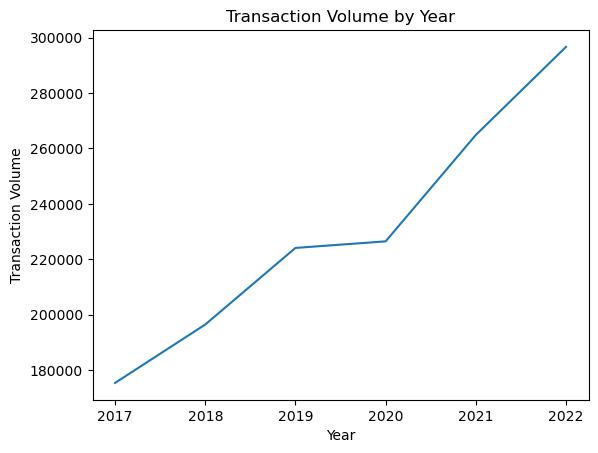

In [21]:
sns.lineplot(x = 'year', y = 'trans', data = tyear)
plt.xlabel('Year')
plt.ylabel('Transaction Volume')
plt.title('Transaction Volume by Year')

plt.show()

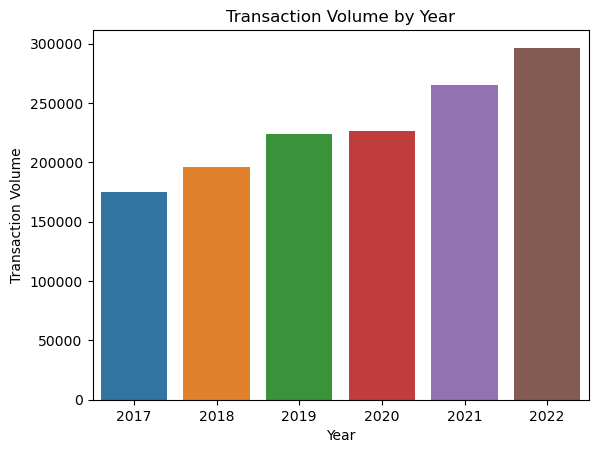

In [82]:
sns.barplot(x = 'year', y = 'trans', data = tyear)
plt.xlabel('Year')
plt.ylabel('Transaction Volume')
plt.title('Transaction Volume by Year')
plt.savefig('size.png', transparent = True, bbox_inches='tight')
plt.show()

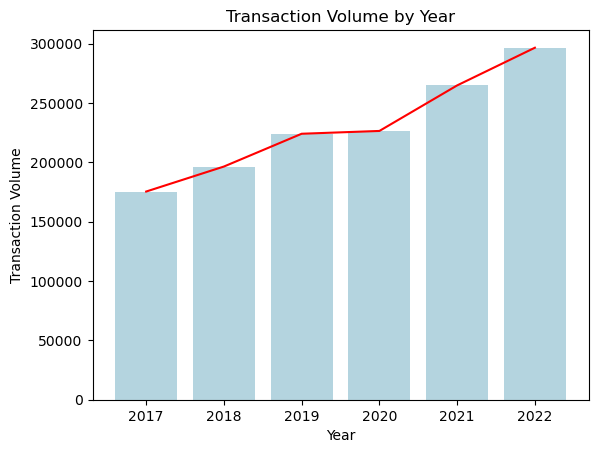

In [23]:
sns.barplot(x = 'year', y = 'trans', data = tyear, color='lightblue')
sns.lineplot(x = 'year', y = 'trans', data = tyear, color='red')
plt.xlabel('Year')
plt.ylabel('Transaction Volume')
plt.title('Transaction Volume by Year')
plt.savefig('tvolume.png', transparent = True, bbox_inches='tight')
plt.show()

In [24]:
tyear_bag = df2[df2['category'] == 'Bags'].groupby('year')['trans'].sum().reset_index()

In [25]:
tyear_bag

,year,trans
0,2017,19244.84
1,2018,22272.09
2,2019,26725.86
3,2020,19160.09
4,2021,23748.27
5,2022,27510.02


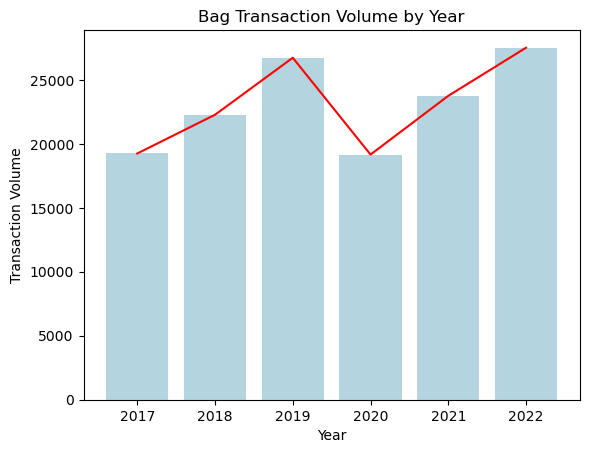

In [26]:
sns.barplot(x = 'year', y = 'trans', data = tyear_bag, color='lightblue')
sns.lineplot(x = 'year', y = 'trans', data = tyear_bag, color='red')
plt.xlabel('Year')
plt.ylabel('Transaction Volume')
plt.title('Bag Transaction Volume by Year')
plt.savefig('tvolume_bags.png', transparent = True, bbox_inches='tight')
plt.show()

### 2.2.2. Seasonal Patterns and Influences in the Korean Fashion Market
- The Korean fashion market typically sees peak sales in November, which marks the beginning of the winter season. However, whether this reflects increased demand or the generally higher price of winter items requires further analysis, especially considering the extended delivery times for these products.
- March, the onset of the spring/summer season, is the second notable sales peak. This may indicate the influence of Korea's distinct four seasons on shopping behavior, as people update their wardrobes. However, with climate change affecting season lengths, it's worth monitoring if March continues to initiate the shopping spree.
- Summer months, particularly August, mark a downturn in sales. This could be due to the rainy season from late June through July, which might dampen consumers' motivation to shop. Furthermore, the vacation period from July to August could also contribute to decreased interest in fashion shopping. It's important to consider that summer items usually have the lowest unit price, so the sales decline may reflect a decrease in item costs rather than a drop in demand. Further analysis is needed to separate these two effects.

In [27]:
tmonth = df2.groupby('month')['trans'].sum().reset_index()
tmonth 

,month,trans
0,01,99144.98
1,02,92664.17
2,03,116908.05
3,04,114211.65
4,05,118403.81
5,06,113087.99
6,07,107733.77
7,08,94224.49
8,09,109791.00
9,10,131334.79


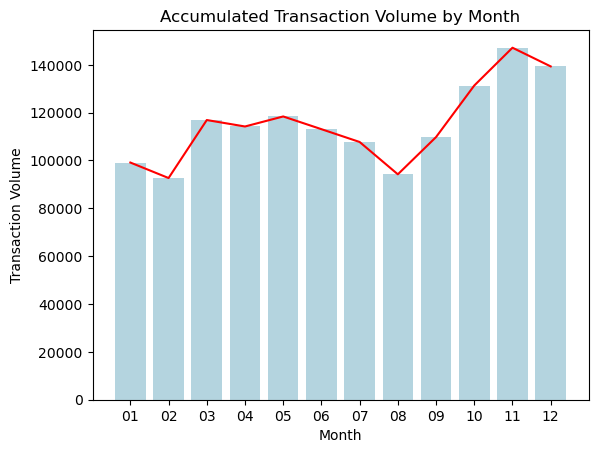

In [28]:
sns.barplot(x = 'month', y = 'trans', data = tmonth, color = 'lightblue')
sns.lineplot(x = 'month', y = 'trans', data = tmonth, color = 'red')
plt.xlabel('Month')
plt.ylabel('Transaction Volume')
plt.title('Accumulated Transaction Volume by Month')
plt.savefig('tvolumem.png', transparent = True, bbox_inches='tight')
plt.show()

In [29]:
tmonth_bag = df2[df2['category'] == 'Bags'].groupby('month')['trans'].sum().reset_index()
tmonth_bag 

,month,trans
0,01,10891.13
1,02,11264.95
2,03,11894.30
3,04,11220.51
4,05,11493.89
5,06,11004.30
6,07,11350.76
7,08,11570.19
8,09,11678.39
9,10,11861.40


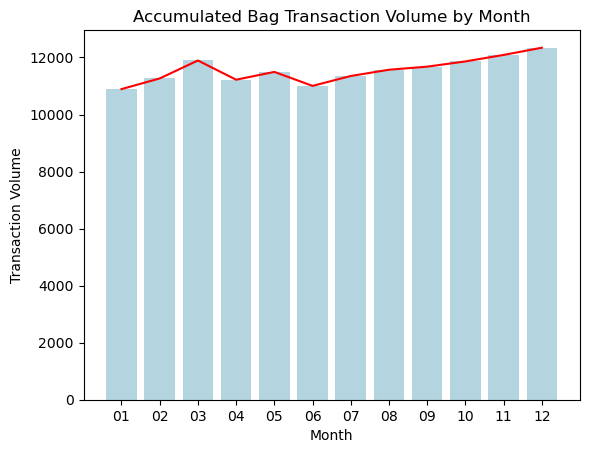

In [30]:
sns.barplot(x = 'month', y = 'trans', data = tmonth_bag, color = 'lightblue')
sns.lineplot(x = 'month', y = 'trans', data = tmonth_bag, color = 'red')
plt.xlabel('Month')
plt.ylabel('Transaction Volume')
plt.title('Accumulated Bag Transaction Volume by Month')
plt.savefig('tvolumem_bags.png', transparent = True, bbox_inches='tight')
plt.show()

In [31]:
tym = df2.groupby(['year', 'month'])['trans'].sum().reset_index()
tym

,year,month,trans
0,2017,01,12553.95
1,2017,02,12563.92
2,2017,03,15303.74
3,2017,04,14488.56
4,2017,05,14598.69
...,...,...,...
67,2022,08,20821.50
68,2022,09,23725.23
69,2022,10,27746.74
70,2022,11,29250.67


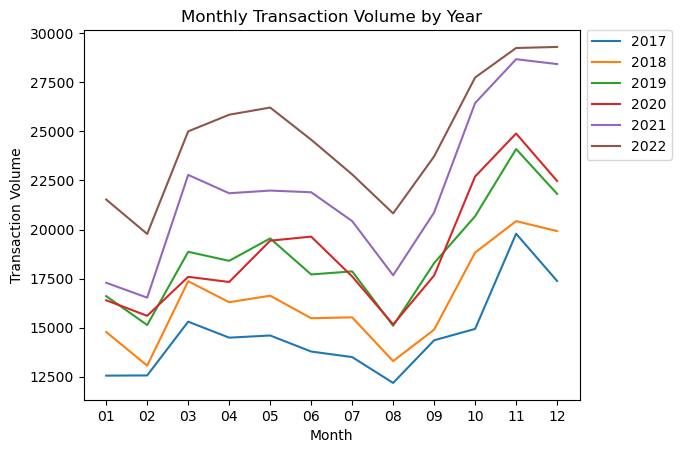

In [32]:
sns.lineplot(x = 'month', y = 'trans', hue = 'year', data = tym)
plt.xlabel('Month')
plt.ylabel('Transaction Volume')
plt.title('Monthly Transaction Volume by Year')
plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1.02))
plt.savefig('myline.png', transparent = True, bbox_inches='tight')
plt.show()

In [33]:
tym_bag = df2[df2['category'] == 'Bags'].groupby(['year', 'month'])['trans'].sum().reset_index()
tym_bag

,year,month,trans
0,2017,01,1436.43
1,2017,02,1632.04
2,2017,03,1686.61
3,2017,04,1593.99
4,2017,05,1523.71
...,...,...,...
67,2022,08,2359.94
68,2022,09,2320.79
69,2022,10,2181.94
70,2022,11,2342.39


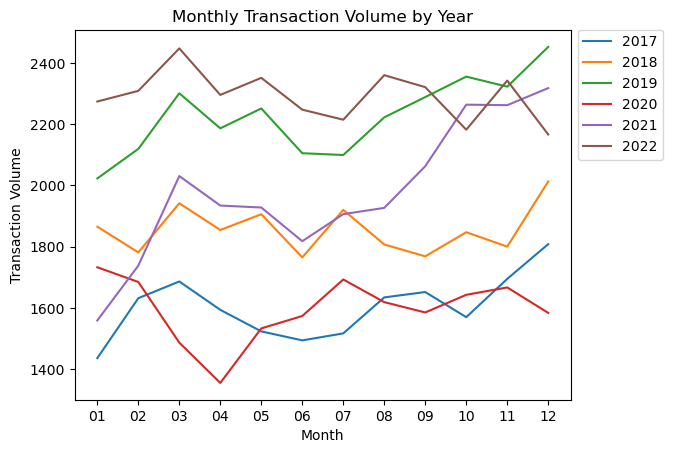

In [34]:
sns.lineplot(x = 'month', y = 'trans', hue = 'year', data = tym_bag)
plt.xlabel('Month')
plt.ylabel('Transaction Volume')
plt.title('Monthly Transaction Volume by Year')
plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1.02))
plt.savefig('myline_bags.png', transparent = True, bbox_inches='tight')
plt.show()

In [35]:
mcat = df2.groupby(['month', 'category'])['trans'].sum().reset_index()
mcat

,month,category,trans
0,01,Accessories,13122.35
1,01,Bags,10891.13
2,01,Clothing,64667.85
3,01,Shoes,10463.65
4,02,Accessories,12374.06
5,02,Bags,11264.95
6,02,Clothing,58346.43
7,02,Shoes,10678.73
8,03,Accessories,13731.30
9,03,Bags,11894.30


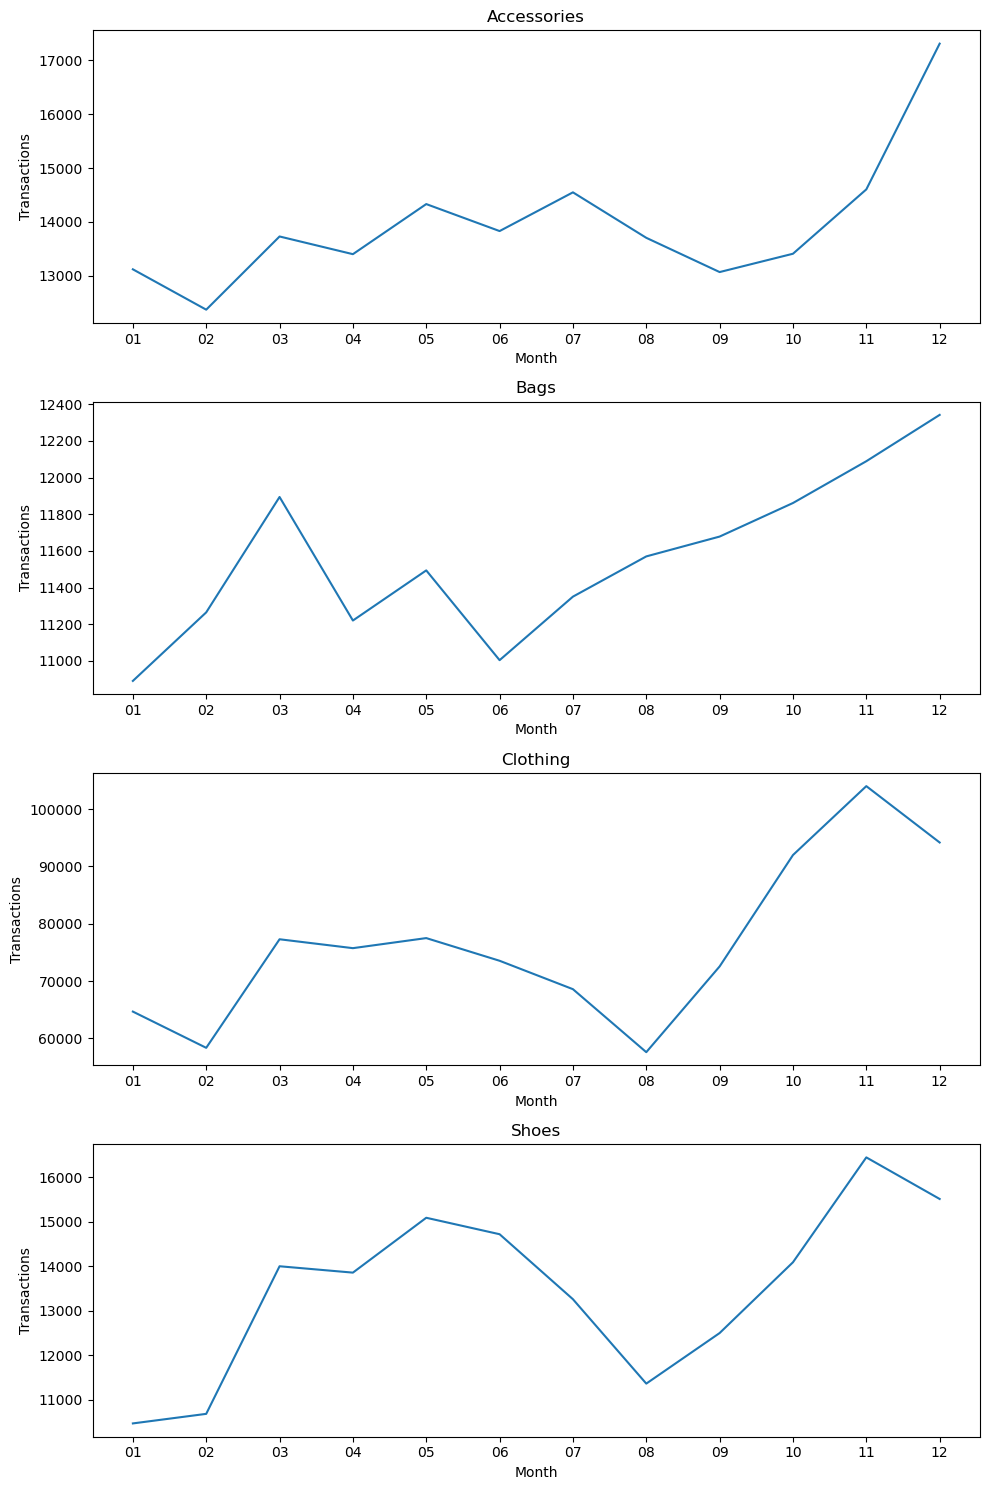

In [36]:
categories = mcat['category'].unique()
fig, axs = plt.subplots(len(categories), 1, figsize=(10, 15))  # Adjust figure size as necessary

for ax, category in zip(axs, categories):
    data = mcat[mcat['category'] == category]
    sns.lineplot(x='month', y='trans', data=data, ax=ax)
    ax.set_xlabel('Month')  # Add x-axis label
    ax.set_ylabel('Transactions')  # Add y-axis label
    ax.set_title(category)

plt.tight_layout()
plt.savefig('monthlytrends.png', transparent = True)
plt.show()

### 2.2.3. Transaction Distribution Across Fashion Categories
- Within the spectrum of fashion-related product categories, clothing dominates, accounting for 66% of all transactions. 
- The remaining share is relatively evenly distributed among the other three categories: bags, shoes, and accessories, each holding approximately 10 to 12% of the total transactions.

In [37]:
tcat = df2.groupby('category')['trans'].sum().reset_index().sort_values(by = 'trans')
tcat

,category,trans
1,Bags,138661.17
3,Shoes,161969.19
0,Accessories,167443.84
2,Clothing,915892.69


In [38]:
tcat['trans'] / tcat['trans'].sum()

1    0.100191
3    0.117033
0    0.120988
2    0.661788
Name: trans, dtype: float64

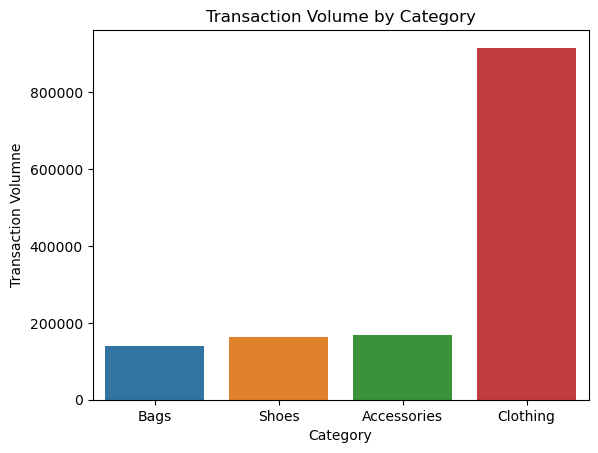

In [39]:
sns.barplot(x = 'category', y = 'trans', data = tcat)
plt.xlabel('Category')
plt.ylabel('Transaction Volumne')
plt.title('Transaction Volume by Category')
plt.savefig('byCat.png', transparent = True)
plt.show()

In [40]:
tcat

,category,trans
1,Bags,138661.17
3,Shoes,161969.19
0,Accessories,167443.84
2,Clothing,915892.69


In [41]:
tcat2017 = df2[df2['year'] == '2017']
tcat2022 = df2[df2['year'] == '2022']

In [42]:
tcat2017 = tcat2017.groupby('category')['trans'].sum().reset_index().sort_values(by = 'trans')
tcat2022 = tcat2022.groupby('category')['trans'].sum().reset_index().sort_values(by = 'trans')

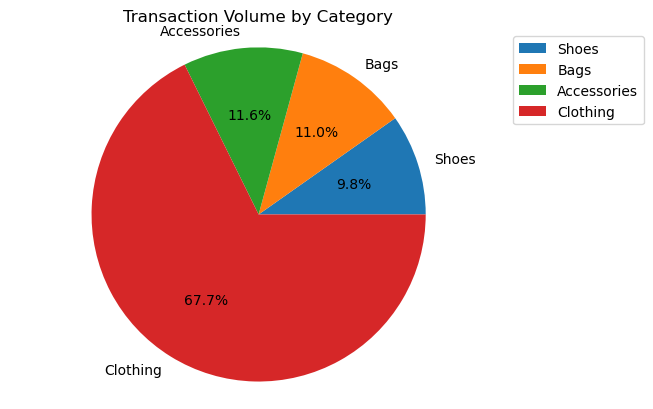

In [43]:
# Create a pie chart
patches, texts, autotexts = plt.pie(tcat2017['trans'], labels = tcat2017['category'], autopct='%1.1f%%')

plt.legend(patches, tcat2017['category'], loc="upper left", bbox_to_anchor = (1,1))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Transaction Volume by Category')
plt.savefig('portionbyCat2017.png', transparent = True, bbox_inches='tight')
plt.show()

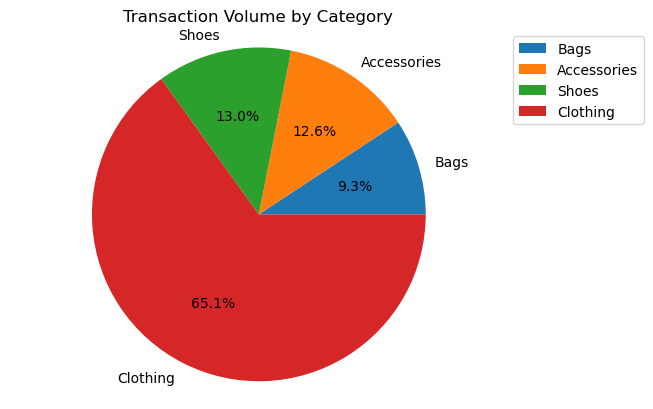

In [44]:
# Create a pie chart
patches, texts, autotexts = plt.pie(tcat2022['trans'], labels = tcat2022['category'], autopct='%1.1f%%')

plt.legend(patches, tcat2022['category'], loc="upper left", bbox_to_anchor = (1,1))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Transaction Volume by Category')
plt.savefig('portionbyCat2022.png', transparent = True, bbox_inches='tight')
plt.show()

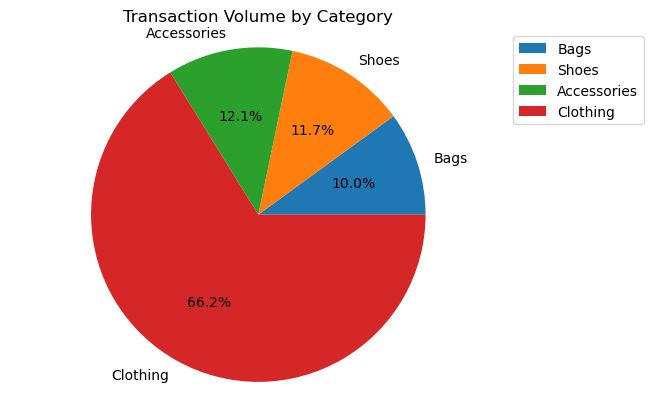

In [45]:
# Create a pie chart
patches, texts, autotexts = plt.pie(tcat['trans'], labels = tcat['category'], autopct='%1.1f%%')

plt.legend(patches, tcat['category'], loc="upper left", bbox_to_anchor = (1,1))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Transaction Volume by Category')
plt.savefig('portionbyCat.png', transparent = True, bbox_inches='tight')
plt.show()

In [46]:
tycat = df2.groupby(['year', 'category'])['trans'].sum().reset_index().sort_values(by = ['year', 'trans'])
tycat

,year,category,trans
3,2017,Shoes,17142.18
1,2017,Bags,19244.84
0,2017,Accessories,20284.22
2,2017,Clothing,118753.66
7,2018,Shoes,18866.37
5,2018,Bags,22272.09
4,2018,Accessories,23368.48
6,2018,Clothing,131983.51
11,2019,Shoes,24205.33
8,2019,Accessories,25719.59


In [47]:
tycat_pivot = tycat.pivot_table(values = 'trans', index = 'category', columns = 'year', aggfunc = 'sum')
tycat_pivot 

year,2017,2018,2019,2020,2021,2022
category,,,,,,
Accessories,20284.22,23368.48,25719.59,27435.53,33197.86,37438.16
Bags,19244.84,22272.09,26725.86,19160.09,23748.27,27510.02
Clothing,118753.66,131983.51,147462.42,150979.15,173739.45,192974.50
Shoes,17142.18,18866.37,24205.33,28904.39,34165.44,38685.48


In [48]:
tycat_growth = tycat_pivot.pct_change(axis = 1) * 100
tycat_growth

year,2017,2018,2019,2020,2021,2022
category,,,,,,
Accessories,NaN,15.205219,10.061031,6.671724,21.003166,12.772811
Bags,NaN,15.730191,19.997091,-28.308799,23.946547,15.840101
Clothing,NaN,11.140583,11.727912,2.384831,15.075128,11.071205
Shoes,NaN,10.058172,28.298820,19.413328,18.201560,13.229860


### 2.2.4. Year-over-Year Fashion Category Trends
- From 2017 to 2022, all four fashion categories consistently experienced over 10% year-to-year growth, with a distinct deviation during the pandemic. Insights from 2020 highlight the industry's responsiveness to global shifts:
    1. Lockdowns curbed bag demand due to reduced outdoor activity. Additionally, logistical challenges in the luxury segment might have hindered inventory circulation, affecting supply and demand balance.
    2. Despite home confinement, the demand for comfortable, at-home apparel, known as "one-mile wear," surged, pushing clothing category sales up.
    3. An unexpected rise in shoe sales during a period of reduced outdoor activities calls for closer investigation. A potential shift in demand from dress shoes to sports shoes, driven by the rise in individual outdoor activities like hiking and running, might explain this trend.
- These findings underscore the fashion industry's fluidity, influenced by global circumstances, and emphasize the necessity of adaptable market strategies.

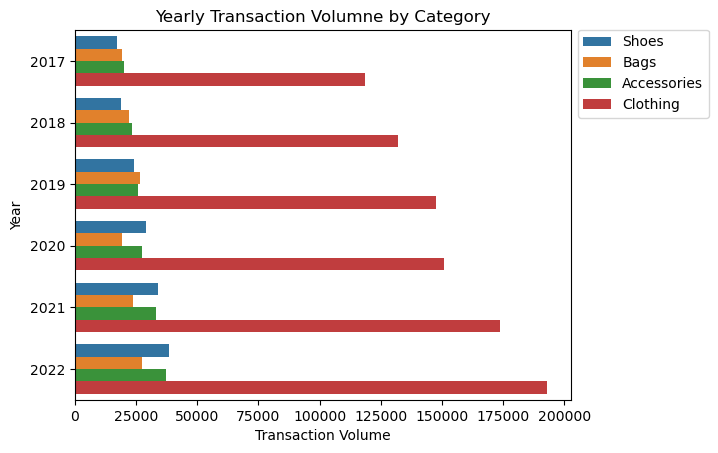

In [49]:
sns.barplot(data = tycat, y = 'year', x = 'trans', hue = 'category')
plt.xlabel('Transaction Volume')
plt.ylabel('Year')
plt.title('Yearly Transaction Volumne by Category')
plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1.02))
plt.savefig('YearbyCat.png', transparent = True, bbox_inches='tight')
plt.show()

In [50]:
tpivot = df2.pivot_table(values = 'trans', index = 'year', columns = 'category', aggfunc = 'sum')
tpivot

category,Accessories,Bags,Clothing,Shoes
year,,,,
2017,20284.22,19244.84,118753.66,17142.18
2018,23368.48,22272.09,131983.51,18866.37
2019,25719.59,26725.86,147462.42,24205.33
2020,27435.53,19160.09,150979.15,28904.39
2021,33197.86,23748.27,173739.45,34165.44
2022,37438.16,27510.02,192974.50,38685.48


### 2.2.5. Stability and Shifts in Category Proportions: Shoes Ascend, Bags Descend
- Over the past five years, the proportions among the four fashion categories remained relatively stable with two notable exceptions:
    1. The shoes category saw a boost in both transaction volume and proportion within the fashion industry, rising to the second largest category post-pandemic.
    2. Conversely, the bags category experienced a contraction, dropping to the lowest portion among the four categories.
- These trends demonstrate the impact of consumer lifestyle changes on category performance and indicate potential future shifts.

<Figure size 2000x600 with 0 Axes>

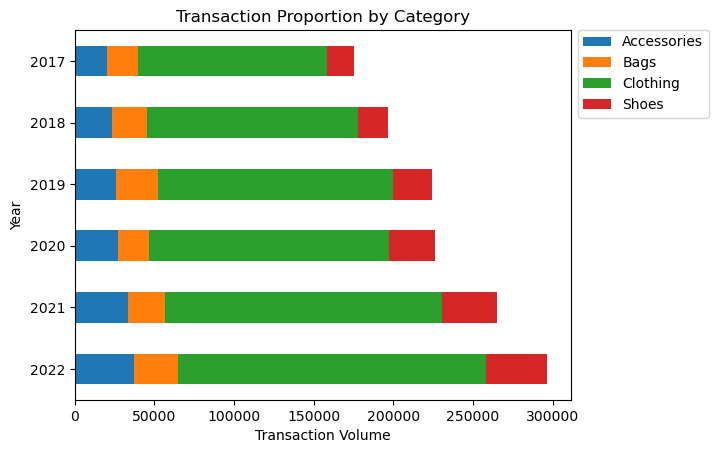

In [51]:
plt.figure(figsize = (20, 6))
tpivot.plot.barh(stacked = True) # use .plot not .plt
plt.gca().invert_yaxis()  # This line inverts the y-axis
plt.xlabel('Transaction Volume')
plt.ylabel('Year')
plt.title('Transaction Proportion by Category')
plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1.02))
plt.savefig('PortionbyCat.png', transparent = True, bbox_inches='tight')
plt.show()

- tpivot.sum(axis = 1) will aggreagte columns by summing horizontally. (Yes, this can be confusing!)
- tpivot.div(..., axis = 0) will divide each row by applying it vertically.

In [52]:
tpivot2 = tpivot.div(tpivot.sum(axis = 1), axis = 0)
tpivot2

category,Accessories,Bags,Clothing,Shoes
year,,,,
2017,0.115629,0.109704,0.676949,0.097718
2018,0.118929,0.113349,0.671704,0.096017
2019,0.114762,0.119252,0.657982,0.108005
2020,0.121139,0.084600,0.666636,0.127625
2021,0.125345,0.089667,0.655989,0.128999
2022,0.126221,0.092749,0.650604,0.130426


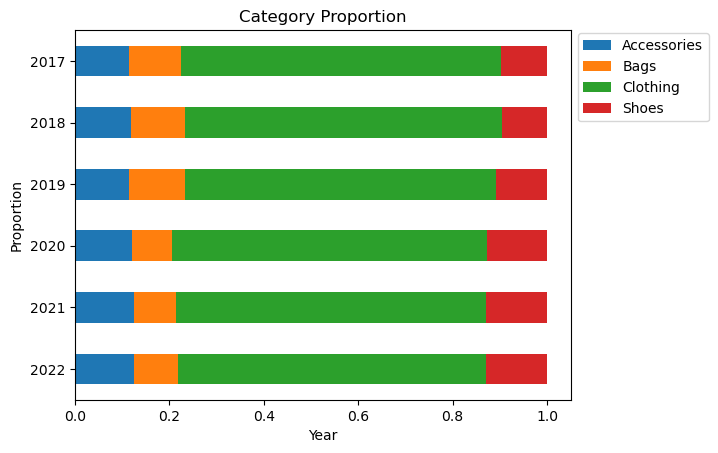

In [53]:
tpivot2.plot.barh(stacked = True) # use .plot not .plt
plt.gca().invert_yaxis() 
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title('Category Proportion')
plt.legend(loc = 'upper left',  bbox_to_anchor=(1, 1.01)) # upper left, not upper right
plt.savefig('Portion2byCat.png', transparent = True, bbox_inches='tight')
plt.show()

### 2.4. Sales Channel Dynamics: Mobile Growth Surges, Online Stabilizes
- A key driver of the extraordinary growth in online fashion sales transactions has been the surge in mobile channel usage.
    1. In stark contrast, the online (PC) channel has seen near-zero growth over the past five years, indicating a stabilization in its user base.
    2. The mobile channel, however, exhibited robust annual growth of 15-20%, with a notable spike of 24% in 2021 - a year of customer sentiment recovery. 
- This divergence underscores the emerging dominance of mobile shopping and the need to strategize accordingly.

In [54]:
tychannel = df2.groupby(['year', 'channel'])['trans'].sum().reset_index()
tychannel

,year,channel,trans
0,2017,mobile,104296.06
1,2017,online,71128.84
2,2018,mobile,124920.78
3,2018,online,71569.67
4,2019,mobile,144771.73
5,2019,online,79341.47
6,2020,mobile,158141.86
7,2020,online,68337.30
8,2021,mobile,195810.26
9,2021,online,69040.76


In [55]:
17220.372308 / 5471.449231 - 1

2.147314647540408

In [56]:
tychannel_pct = tychannel.pivot_table(values = 'trans', index = 'channel', columns = 'year', aggfunc = 'sum')
tychannel_pct = tychannel_pct.pct_change(axis =1)
tychannel_pct

year,2017,2018,2019,2020,2021,2022
channel,,,,,,
mobile,NaN,0.197752,0.158908,0.092353,0.238194,0.143274
online,NaN,0.006198,0.108591,-0.138694,0.010294,0.053629


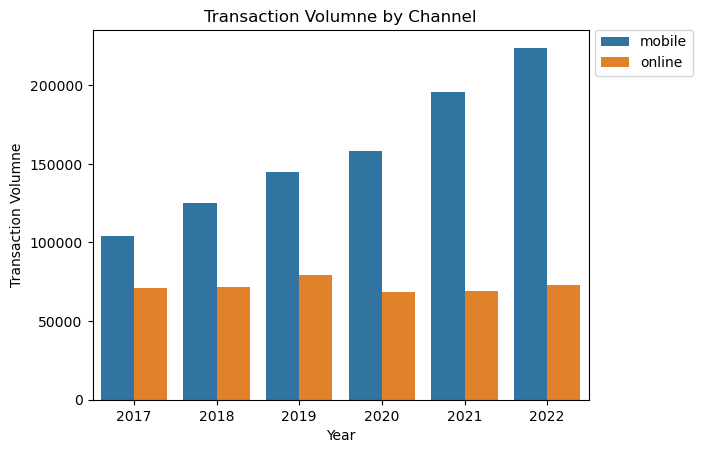

In [57]:
sns.barplot(x = 'year', y = 'trans', hue = 'channel', data = tychannel)
plt.xlabel('Year')
plt.ylabel('Transaction Volumne')
plt.title('Transaction Volumne by Channel')
plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1.02))
plt.savefig('barbyChannel.png', transparent = True, bbox_inches='tight')
plt.show()

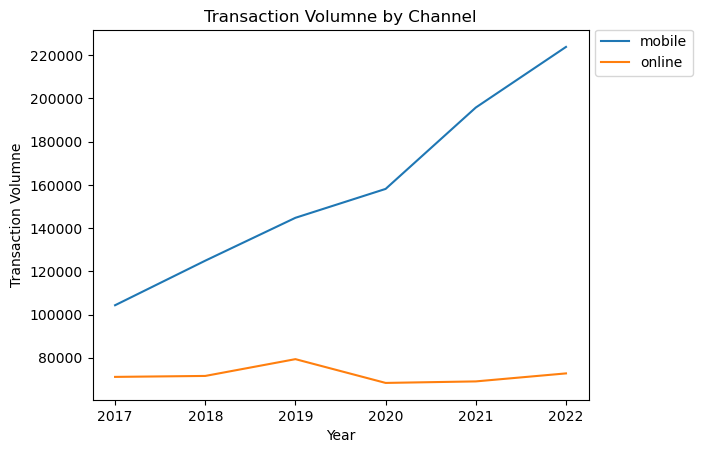

In [58]:
sns.lineplot(x = 'year', y = 'trans', hue = 'channel', data = tychannel)
plt.xlabel('Year')
plt.ylabel('Transaction Volumne')
plt.title('Transaction Volumne by Channel')
plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1.02))
plt.savefig('linebyChannel.png', transparent = True, bbox_inches='tight')
plt.show()

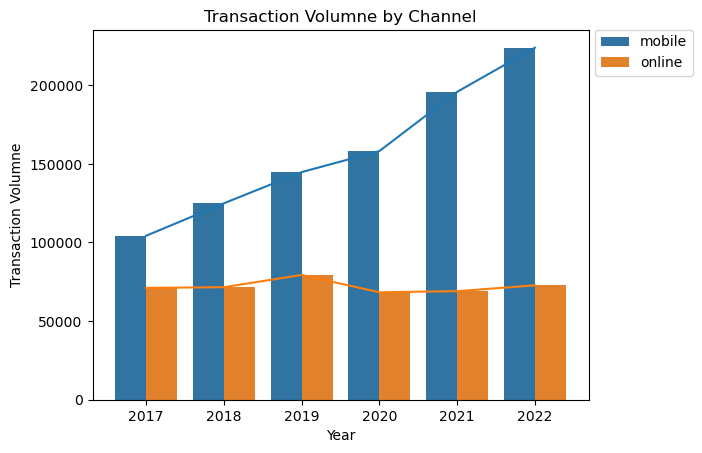

In [59]:
sns.barplot(x = 'year', y = 'trans', hue = 'channel', data = tychannel)
sns.lineplot(x = 'year', y = 'trans', hue = 'channel', data = tychannel, legend=False)
plt.xlabel('Year')
plt.ylabel('Transaction Volumne')
plt.title('Transaction Volumne by Channel')
plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1.02))
plt.savefig('byChannel.png', transparent = True, bbox_inches='tight')
plt.show()

In [60]:
tychannel_pivot = tychannel.pivot(values = 'trans', index = 'year', columns = 'channel')
tychannel_pivot

channel,mobile,online
year,,
2017,104296.06,71128.84
2018,124920.78,71569.67
2019,144771.73,79341.47
2020,158141.86,68337.30
2021,195810.26,69040.76
2022,223864.84,72743.32


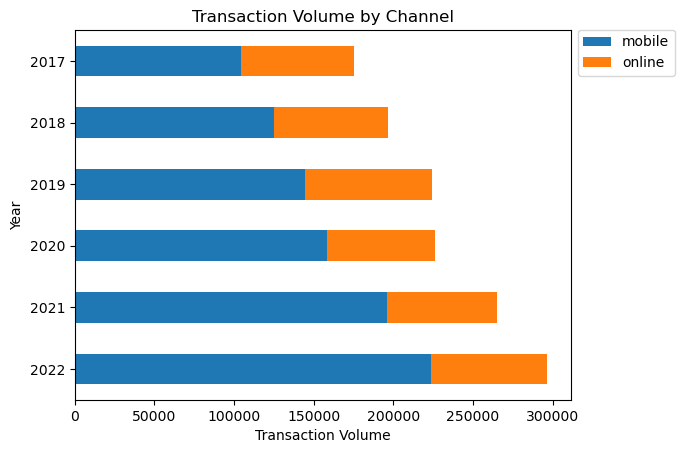

In [61]:
tychannel_pivot.plot.barh(stacked = True)
plt.gca().invert_yaxis() # upper left, not upper right
plt.xlabel('Transaction Volume')
plt.ylabel('Year')
plt.title('Transaction Volume by Channel')
plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1.02))
plt.savefig('stackedbyChannel.png', transparent = True, bbox_inches='tight')
plt.show()

In [62]:
tychannel_pivot2 = tychannel_pivot.div(tychannel_pivot.sum(axis = 1), axis = 0)
tychannel_pivot2

channel,mobile,online
year,,
2017,0.594534,0.405466
2018,0.635760,0.364240
2019,0.645976,0.354024
2020,0.698262,0.301738
2021,0.739322,0.260678
2022,0.754749,0.245251


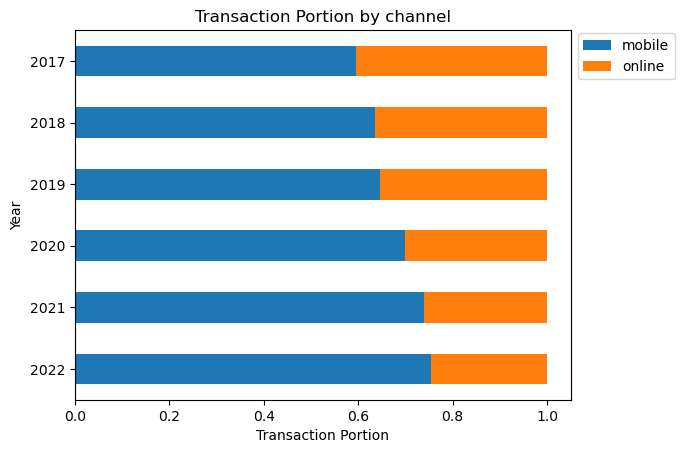

In [63]:
tychannel_pivot2.plot.barh(stacked = True)
plt.gca().invert_yaxis()
plt.xlabel('Transaction Portion')
plt.ylabel('Year')
plt.title('Transaction Portion by channel')
plt.legend(loc = 'upper left',  bbox_to_anchor=(1, 1.01))
plt.savefig('1stackedplotbyCat.png', transparent = True, bbox_inches='tight')
plt.show()

### 2.2.6. Sales Channel Proportions Across Fashion Categories
- Across all fashion categories, the ratio of mobile to online (PC) purchases is fairly consistent, with an approximate 30:70 split.
- Notably, a slight disparity emerges between categories such as bags and accessories, compared to clothing and shoes. Mobile purchases account for over 70% in the former categories, hinting at distinctive purchasing behaviors. Potential assumptions behind this behavior could include:
    1. Visibility: Given the larger screen size, PCs may offer better visibility when searching for items. For categories with size variants like clothing and shoes, customers might prefer the thoroughness provided by PC browsing.
    2. Pricing and Impulse Buying: The ease of payment functions on mobile platforms can facilitate more instantaneous and impulsive purchases. This could be particularly relevant for categories like accessories and bags, which often have a more flexible price range and typically don't involve sizing issues.

In [64]:
tcchannel = df2.groupby(['category', 'channel'])['trans'].sum().reset_index()
tcchannel

,category,channel,trans
0,Accessories,mobile,120878.32
1,Accessories,online,46565.52
2,Bags,mobile,102327.41
3,Bags,online,36333.76
4,Clothing,mobile,620041.84
5,Clothing,online,295850.85
6,Shoes,mobile,108557.96
7,Shoes,online,53411.23


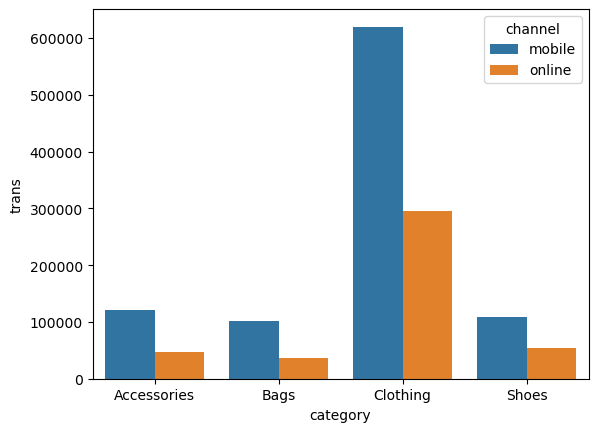

In [65]:
sns.barplot(x = 'category', y = 'trans', hue = 'channel', data = tcchannel)
plt.show()

In [66]:
tcchannel_pivot = tcchannel.pivot_table(values = 'trans', index = 'category', columns = 'channel', aggfunc = 'sum')

In [67]:
tcchannel_pivot2 = tcchannel_pivot.div(tcchannel_pivot.sum(axis = 1), axis = 0)
tcchannel_pivot2

channel,mobile,online
category,,
Accessories,0.721904,0.278096
Bags,0.737967,0.262033
Clothing,0.676981,0.323019
Shoes,0.670238,0.329762


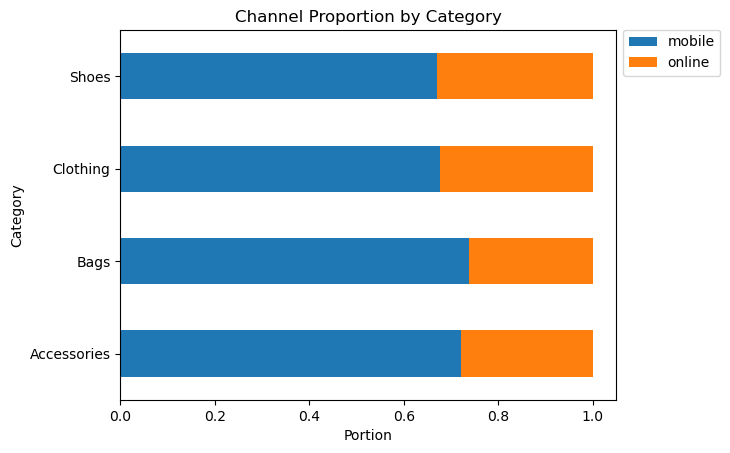

In [68]:
tcchannel_pivot2.plot.barh(stacked = True)
plt.xlabel('Portion')
plt.ylabel('Category')
plt.title('Channel Proportion by Category')
plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1.02))
plt.savefig('1stackedplotbyChannel.png', transparent = True, bbox_inches='tight')
plt.show()

# 2. Data Handling
## 2.3. Export Data 
- As part of our data analysis pipeline, the time series data will be processed in R. Hence, we export the data in the .csv format for seamless interoperability.
- In a separate file, we will design, train, and evaluate a predictive model tailored to our business context. This model will then be deployed to address real-world scenarios within the Korean fashion industry.

In [69]:
df_ts = df.groupby(['year', 'month'])['trans'].sum().reset_index()
df_ts

,year,month,trans
0,2017,01,12553.95
1,2017,02,12563.92
2,2017,03,15303.74
3,2017,04,14488.56
4,2017,05,14598.69
...,...,...,...
70,2022,11,29250.67
71,2022,12,29305.43
72,2023,01,21984.78
73,2023,02,22173.62


In [70]:
df_ts.to_csv('df_ts.csv')

In [71]:
df_ts_on = df.groupby(['year', 'month', 'channel'])['trans'].sum().reset_index()
df_ts_on = df_ts_on[df_ts_on ['channel'] == 'online'].copy()
df_ts_on

,year,month,channel,trans
1,2017,01,online,5405.98
3,2017,02,online,5391.23
5,2017,03,online,6518.62
7,2017,04,online,6024.73
9,2017,05,online,6018.63
...,...,...,...,...
141,2022,11,online,7541.75
143,2022,12,online,7433.15
145,2023,01,online,5455.73
147,2023,02,online,5930.63


In [72]:
df_ts_on.to_csv('df_ts_on.csv')

In [73]:
df_ts_mo = df.groupby(['year', 'month', 'channel'])['trans'].sum().reset_index()
df_ts_mo = df_ts_mo[df_ts_mo ['channel'] == 'mobile'].copy()
df_ts_mo

,year,month,channel,trans
0,2017,01,mobile,7147.97
2,2017,02,mobile,7172.69
4,2017,03,mobile,8785.12
6,2017,04,mobile,8463.83
8,2017,05,mobile,8580.06
...,...,...,...,...
140,2022,11,mobile,21708.92
142,2022,12,mobile,21872.28
144,2023,01,mobile,16529.05
146,2023,02,mobile,16242.99


In [74]:
df_ts_mo.to_csv('df_ts_mo.csv')

In [75]:
df_bag = df[df['category'] == 'Bags'].copy()
df_bag

,category,channel,trans,year,month
4,Bags,online,439.78,2017,01
5,Bags,mobile,996.65,2017,01
12,Bags,online,531.27,2017,02
13,Bags,mobile,1100.77,2017,02
20,Bags,online,540.28,2017,03
...,...,...,...,...,...
581,Bags,mobile,1738.64,2023,01
588,Bags,online,720.07,2023,02
589,Bags,mobile,1727.38,2023,02
596,Bags,online,798.14,2023,03


In [76]:
df_ts_bag = df_bag.groupby(['year', 'month', 'category'])['trans'].sum().reset_index()
df_ts_bag 

,year,month,category,trans
0,2017,01,Bags,1436.43
1,2017,02,Bags,1632.04
2,2017,03,Bags,1686.61
3,2017,04,Bags,1593.99
4,2017,05,Bags,1523.71
...,...,...,...,...
70,2022,11,Bags,2342.39
71,2022,12,Bags,2166.35
72,2023,01,Bags,2351.79
73,2023,02,Bags,2447.45


In [77]:
df_ts_bag.to_csv('df_ts_bag.csv')

In [78]:
dg_ts_bag_on = df_bag[df_bag['channel'] == 'online']
dg_ts_bag_on

,category,channel,trans,year,month
4,Bags,online,439.78,2017,01
12,Bags,online,531.27,2017,02
20,Bags,online,540.28,2017,03
28,Bags,online,472.50,2017,04
36,Bags,online,450.44,2017,05
...,...,...,...,...,...
564,Bags,online,617.17,2022,11
572,Bags,online,557.26,2022,12
580,Bags,online,613.15,2023,01
588,Bags,online,720.07,2023,02


In [79]:
dg_ts_bag_on.to_csv('dg_ts_bag_on.csv')

In [80]:
dg_ts_bag_mo = df_bag[df_bag['channel'] == 'mobile']
dg_ts_bag_mo

,category,channel,trans,year,month
5,Bags,mobile,996.65,2017,01
13,Bags,mobile,1100.77,2017,02
21,Bags,mobile,1146.33,2017,03
29,Bags,mobile,1121.49,2017,04
37,Bags,mobile,1073.27,2017,05
...,...,...,...,...,...
565,Bags,mobile,1725.22,2022,11
573,Bags,mobile,1609.09,2022,12
581,Bags,mobile,1738.64,2023,01
589,Bags,mobile,1727.38,2023,02


In [81]:
dg_ts_bag_mo.to_csv('dg_ts_bag_mo.csv')